In [149]:
"""
API key:        IqeYRfap72wwkCsEk6kEqCatO

API secret key: jMBrwnL0yXnWvu6z0qhnmXtD9j63RImxXTv4X4xCe6m0tNQX32

Access token : 1292203153518219269-c55cnj4fVLxHsdJLIfnhGlZLdDJGas 

Access token secret :QjPPuvupbjb36GIauEUC5t9o6FWqj0hOdmMkOngBUrpwo


"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

from wordcloud import WordCloud 

In [150]:
consumer_key= 'UVjQMDURub3Z0CB2IcgN8iFvO'
consumer_secret_key= '4PAkZNwRvnOBsr3NT8gPFBBbzvob0qDpHDwK2rAgZsHoy8Fh1y'
access_token= '1292203153518219269-c55cnj4fVLxHsdJLIfnhGlZLdDJGas'
access_token_secret= 'QjPPuvupbjb36GIauEUC5t9o6FWqj0hOdmMkOngBUrpwo'    

In [151]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
authenticate.set_access_token(access_token, access_token_secret)

In [152]:
#create API object while passing in Auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [153]:
#extract 100 tweets from twitter user
posts = api.user_timeline(screen_name='Moderna', count=100, lang='en', tweet_mode='extended')

In [154]:
posts[0]._json

{'created_at': 'Thu Nov 19 11:18:09 +0000 2020',
 'id': 1329383456233689088,
 'id_str': '1329383456233689088',
 'full_text': 'Just posted a photo @ KCRW Berlin https://t.co/XROG7NL4y2',
 'truncated': False,
 'display_text_range': [0, 57],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/XROG7NL4y2',
    'expanded_url': 'https://www.instagram.com/p/CHxTdoVgGQa/?igshid=8twmqv0xmiwa',
    'display_url': 'instagram.com/p/CHxTdoVgGQa/…',
    'indices': [34, 57]}]},
 'source': '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 218587305,
  'id_str': '218587305',
  'name': 'Moderna',
  'screen_name': 'Moderna',
  'location': 'BERLIN, GERMANY',
  'description': '',
  'url': 'https://t.co/qv8IBfSpRT',
  'entities': {'url': {'urls': [{'url': 'https://t

In [155]:
tweet_list = []
for twt in posts:
    tweet_list.append(twt._json)

tweet_list

[{'created_at': 'Thu Nov 19 11:18:09 +0000 2020',
  'id': 1329383456233689088,
  'id_str': '1329383456233689088',
  'full_text': 'Just posted a photo @ KCRW Berlin https://t.co/XROG7NL4y2',
  'truncated': False,
  'display_text_range': [0, 57],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/XROG7NL4y2',
     'expanded_url': 'https://www.instagram.com/p/CHxTdoVgGQa/?igshid=8twmqv0xmiwa',
     'display_url': 'instagram.com/p/CHxTdoVgGQa/…',
     'indices': [34, 57]}]},
  'source': '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 218587305,
   'id_str': '218587305',
   'name': 'Moderna',
   'screen_name': 'Moderna',
   'location': 'BERLIN, GERMANY',
   'description': '',
   'url': 'https://t.co/qv8IBfSpRT',
   'entities': {'url': {

In [156]:
tweet_data = pd.DataFrame.from_records(tweet_list)

In [157]:
tweet_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweeted_status
0,Thu Nov 19 11:18:09 +0000 2020,1329383456233689088,1329383456233689088,Just posted a photo @ KCRW Berlin https://t.co...,False,"[0, 57]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://instagram.com"" rel=""nofollow"">...",None,None,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Nov 06 15:14:29 +0000 2020,1324731889475756033,1324731889475756033,Just posted a photo https://t.co/vNlVbXFNdg,False,"[0, 43]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://instagram.com"" rel=""nofollow"">...",None,None,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Oct 29 17:03:12 +0000 2020,1321860147610898432,1321860147610898432,Just posted a video https://t.co/4R6U18eLnd,False,"[0, 43]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://instagram.com"" rel=""nofollow"">...",None,None,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Sep 27 23:39:37 +0000 2020,1310363495465201664,1310363495465201664,‘It wasn’t us’ \nBrava @katharina_grosse 🌈🖤\n\...,False,"[0, 168]",{'hashtags': [{'text': 'hamburgerbahnhofmuseum...,"<a href=""http://instagram.com"" rel=""nofollow"">...",None,None,...,False,False,False,de,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat Jun 06 04:24:18 +0000 2020,1269122923899617281,1269122923899617281,Berlin today 14 H at Alexanderplatz #BlackLive...,False,"[0, 78]",{'hashtags': [{'text': 'BlackLivesMatterGerman...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,...,False,False,False,en,"{'media': [{'id': 1269122822888136705, 'id_str...",NaN,NaN,NaN,NaN,NaN


In [158]:
tweet_df = tweet_data[['created_at','full_text']]
tweet_df.head()

,created_at,full_text
0,Thu Nov 19 11:18:09 +0000 2020,Just posted a photo @ KCRW Berlin https://t.co...
1,Fri Nov 06 15:14:29 +0000 2020,Just posted a photo https://t.co/vNlVbXFNdg
2,Thu Oct 29 17:03:12 +0000 2020,Just posted a video https://t.co/4R6U18eLnd
3,Sun Sep 27 23:39:37 +0000 2020,‘It wasn’t us’ \nBrava @katharina_grosse 🌈🖤\n\...
4,Sat Jun 06 04:24:18 +0000 2020,Berlin today 14 H at Alexanderplatz #BlackLive...


In [159]:
tweet_df['created_at']

0     Thu Nov 19 11:18:09 +0000 2020
1     Fri Nov 06 15:14:29 +0000 2020
2     Thu Oct 29 17:03:12 +0000 2020
3     Sun Sep 27 23:39:37 +0000 2020
4     Sat Jun 06 04:24:18 +0000 2020
                   ...              
94    Thu Mar 08 21:23:26 +0000 2018
95    Mon Mar 05 06:29:47 +0000 2018
96    Sat Mar 03 17:29:54 +0000 2018
97    Fri Mar 02 21:18:09 +0000 2018
98    Fri Mar 02 01:58:03 +0000 2018
Name: created_at, Length: 99, dtype: object

In [160]:
tweet_df['Date'] = pd.to_datetime(tweet_df['created_at'])

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
tweet_df = tweet_df.drop(['created_at'],axis=1)

In [162]:
tweet_df.head()

,full_text,Date
0,Just posted a photo @ KCRW Berlin https://t.co...,2020-11-19 11:18:09+00:00
1,Just posted a photo https://t.co/vNlVbXFNdg,2020-11-06 15:14:29+00:00
2,Just posted a video https://t.co/4R6U18eLnd,2020-10-29 17:03:12+00:00
3,‘It wasn’t us’ \nBrava @katharina_grosse 🌈🖤\n\...,2020-09-27 23:39:37+00:00
4,Berlin today 14 H at Alexanderplatz #BlackLive...,2020-06-06 04:24:18+00:00


In [163]:
tweet_df['Date'][1:5]

1   2020-11-06 15:14:29+00:00
2   2020-10-29 17:03:12+00:00
3   2020-09-27 23:39:37+00:00
4   2020-06-06 04:24:18+00:00
Name: Date, dtype: datetime64[ns, UTC]

In [164]:
import datetime

In [165]:
# dt.strftime("%d-%m-%Y")
#days = datetime.datetime.strptime(tweet_df['Date'],"%d %b %Y")
tweet_df['Date'] = pd.to_datetime(tweet_df['Date'], format='%Y:%M:%D').dt.date

In [166]:
tweet_df.head()

,full_text,Date
0,Just posted a photo @ KCRW Berlin https://t.co...,2020-11-19
1,Just posted a photo https://t.co/vNlVbXFNdg,2020-11-06
2,Just posted a video https://t.co/4R6U18eLnd,2020-10-29
3,‘It wasn’t us’ \nBrava @katharina_grosse 🌈🖤\n\...,2020-09-27
4,Berlin today 14 H at Alexanderplatz #BlackLive...,2020-06-06


In [167]:
#tweet_df.reset_index('Date')
tweet_df.set_index(["Date"], inplace = True) 

In [168]:
tweet_df.head()

,full_text
Date,
2020-11-19,Just posted a photo @ KCRW Berlin https://t.co...
2020-11-06,Just posted a photo https://t.co/vNlVbXFNdg
2020-10-29,Just posted a video https://t.co/4R6U18eLnd
2020-09-27,‘It wasn’t us’ \nBrava @katharina_grosse 🌈🖤\n\...
2020-06-06,Berlin today 14 H at Alexanderplatz #BlackLive...


In [169]:
tweet_list[0]

{'created_at': 'Thu Nov 19 11:18:09 +0000 2020',
 'id': 1329383456233689088,
 'id_str': '1329383456233689088',
 'full_text': 'Just posted a photo @ KCRW Berlin https://t.co/XROG7NL4y2',
 'truncated': False,
 'display_text_range': [0, 57],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/XROG7NL4y2',
    'expanded_url': 'https://www.instagram.com/p/CHxTdoVgGQa/?igshid=8twmqv0xmiwa',
    'display_url': 'instagram.com/p/CHxTdoVgGQa/…',
    'indices': [34, 57]}]},
 'source': '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 218587305,
  'id_str': '218587305',
  'name': 'Moderna',
  'screen_name': 'Moderna',
  'location': 'BERLIN, GERMANY',
  'description': '',
  'url': 'https://t.co/qv8IBfSpRT',
  'entities': {'url': {'urls': [{'url': 'https://t

In [170]:
tweet_list[3]

{'created_at': 'Sun Sep 27 23:39:37 +0000 2020',
 'id': 1310363495465201664,
 'id_str': '1310363495465201664',
 'full_text': '‘It wasn’t us’ \nBrava @katharina_grosse 🌈🖤\n\n#hamburgerbahnhofmuseum #katharinagrosse #berlin @ Hamburger Bahnhof – Museum für Gegenwart – Berlin https://t.co/HyLU5PEti0',
 'truncated': False,
 'display_text_range': [0, 168],
 'entities': {'hashtags': [{'text': 'hamburgerbahnhofmuseum',
    'indices': [44, 67]},
   {'text': 'katharinagrosse', 'indices': [68, 84]},
   {'text': 'berlin', 'indices': [85, 92]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/HyLU5PEti0',
    'expanded_url': 'https://www.instagram.com/p/CFqKL21ANJC/?igshid=u6v0cajk78gp',
    'display_url': 'instagram.com/p/CFqKL21ANJC/…',
    'indices': [145, 168]}]},
 'source': '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 '

In [171]:
help(posts[0])

Help on Status in module tweepy.models object:

class Status(Model)
 |  Method resolution order:
 |      Status
 |      Model
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __ne__(self, other)
 |      Return self!=value.
 |  
 |  destroy(self)
 |  
 |  favorite(self)
 |  
 |  retweet(self)
 |  
 |  retweets(self)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  parse(api, json) from builtins.type
 |      Parse a JSON object into a model instance.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __hash__ = None
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Model:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, api=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |

In [172]:
data_df = pd.DataFrame(posts)
data_df.head()

,0
0,Status(_api=<tweepy.api.API object at 0x7fa508...
1,Status(_api=<tweepy.api.API object at 0x7fa508...
2,Status(_api=<tweepy.api.API object at 0x7fa508...
3,Status(_api=<tweepy.api.API object at 0x7fa508...
4,Status(_api=<tweepy.api.API object at 0x7fa508...


In [173]:
#print('Show the 5 recent tweets:\n')
i = 1
for tweet in posts[0:20]:
    print(str(i) +  ') ' + str(tweet.created_at) + ' ' + tweet.full_text + '\n') 
    i = i +1

1) 2020-11-19 11:18:09 Just posted a photo @ KCRW Berlin https://t.co/XROG7NL4y2

2) 2020-11-06 15:14:29 Just posted a photo https://t.co/vNlVbXFNdg

3) 2020-10-29 17:03:12 Just posted a video https://t.co/4R6U18eLnd

4) 2020-09-27 23:39:37 ‘It wasn’t us’ 
Brava @katharina_grosse 🌈🖤

#hamburgerbahnhofmuseum #katharinagrosse #berlin @ Hamburger Bahnhof – Museum für Gegenwart – Berlin https://t.co/HyLU5PEti0

5) 2020-06-06 04:24:18 Berlin today 14 H at Alexanderplatz #BlackLivesMatterGermany #BlackLivesMatter https://t.co/2RDaIZVgQy

6) 2020-06-06 04:07:22 Even @sesamestreet is sick of this shit.. https://t.co/OL9ZN5gjLe

7) 2020-06-05 09:40:51 Berlin. Tomorrow. 🏳️‍🌈🖤🏳️‍🌈 
#blacklivesmatter #blacktranslivesmatter 
#whitesilenceisviolence 
#fuckwhitesupremacy @ Alexanderplatz Berlin https://t.co/f9SQfcAS16

8) 2020-06-01 19:09:40 Brave New Rave stands in solidarity with the black community against all forms of racism, bigotry and violence. 

We will observe Black Out Tuesday tomorrow June

In [174]:
date_tweet = pd.DataFrame()

In [175]:
df_1 = pd.DataFrame([tweet.full_text for tweet in posts])

In [176]:
df_1.head()

,0
0,Just posted a photo @ KCRW Berlin https://t.co...
1,Just posted a photo https://t.co/vNlVbXFNdg
2,Just posted a video https://t.co/4R6U18eLnd
3,‘It wasn’t us’ \nBrava @katharina_grosse 🌈🖤\n\...
4,Berlin today 14 H at Alexanderplatz #BlackLive...


In [177]:
#create a dataframe with column called tweet
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [178]:
df.head()

,Tweets
0,Just posted a photo @ KCRW Berlin https://t.co...
1,Just posted a photo https://t.co/vNlVbXFNdg
2,Just posted a video https://t.co/4R6U18eLnd
3,‘It wasn’t us’ \nBrava @katharina_grosse 🌈🖤\n\...
4,Berlin today 14 H at Alexanderplatz #BlackLive...


In [179]:
#clean the text
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #r-tells python that expression is a raw tring, once we find substitute fo empty string
  #get rid of any hashtag or number sign
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)  #retweets followed by 1 or more white spaces
    #remove the hyper link
    text = re.sub(r'https?:\/\/\S+','', text)      #may have 0 or 1 s character
    
    return text

In [180]:
#cleaning hte text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [181]:
df.head()

,Tweets
0,Just posted a photo @ KCRW Berlin
1,Just posted a photo
2,Just posted a video
3,‘It wasn’t us’ \nBrava _grosse 🌈🖤\n\nhamburger...
4,Berlin today 14 H at Alexanderplatz BlackLives...


In [182]:
#get subjectivity (how subjective or opinated text is)and pularity (how postive or negative text is)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [183]:
#create 2 new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [184]:
"""

"""
df.head(10)

,Tweets,Subjectivity,Polarity
0,Just posted a photo @ KCRW Berlin,0.000000,0.000000
1,Just posted a photo,0.000000,0.000000
2,Just posted a video,0.000000,0.000000
3,‘It wasn’t us’ \nBrava _grosse 🌈🖤\n\nhamburger...,0.000000,0.000000
4,Berlin today 14 H at Alexanderplatz BlackLives...,0.000000,0.000000
5,Even is sick of this shit..,0.828571,-0.457143
6,Berlin. Tomorrow. 🏳️‍🌈🖤🏳️‍🌈 \nblacklivesmatter...,0.000000,0.000000
7,Brave New Rave stands in solidarity with the b...,0.580303,0.150758
8,: Massive thank yous to and !! x,1.000000,0.000000
9,: La entrega numero XX de Maze Escape ya esta ...,0.000000,0.000000


In [185]:
#want to see how well the sentiments are distributed
#word cloud or text cloud
#the mor eword appear the more it appears in word cloud
#plot word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=700, height=500, random_state=21,max_font_size=110).generate(allWords)

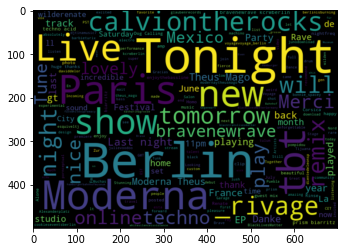

In [186]:
plt.imshow(wordCloud,interpolation='bilinear')

In [187]:
#function to compute the negative, neutral and positve analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [188]:
#polarity is the score and going to apply the  function
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [189]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,Just posted a photo @ KCRW Berlin,0.000000,0.00,Neutral
1,Just posted a photo,0.000000,0.00,Neutral
2,Just posted a video,0.000000,0.00,Neutral
3,‘It wasn’t us’ \nBrava _grosse 🌈🖤\n\nhamburger...,0.000000,0.00,Neutral
4,Berlin today 14 H at Alexanderplatz BlackLives...,0.000000,0.00,Neutral
...,...,...,...,...
94,hoy esta noche m.n.roy \nModerna Y Theus Mago ...,0.000000,0.00,Neutral
95,Mexico City. Last night was incredible. muchas...,0.483333,0.45,Positive
96,Tonight Mexico City acid will be played... ✖️🎶...,0.000000,0.00,Neutral
97,en ruta.. hasta pronto Puebla ✖️🎶🌈🎶✖️ \ndiente...,0.000000,0.00,Neutral


In [190]:
df['Analysis'].value_counts()

Positive    54
Neutral     42
Negative     3
Name: Analysis, dtype: int64

In [191]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    j = j+1

1) Just posted a photo @ KCRW Berlin 
2) Just posted a photo 
3) Just posted a video 
4) ‘It wasn’t us’ 
Brava _grosse 🌈🖤

hamburgerbahnhofmuseum katharinagrosse berlin @ Hamburger Bahnhof – Museum für Gegenwart – Berlin 
5) Berlin today 14 H at Alexanderplatz BlackLivesMatterGermany BlackLivesMatter 
6) Even  is sick of this shit.. 
7) Berlin. Tomorrow. 🏳️‍🌈🖤🏳️‍🌈 
blacklivesmatter blacktranslivesmatter 
whitesilenceisviolence 
fuckwhitesupremacy @ Alexanderplatz Berlin 
8) Brave New Rave stands in solidarity with the black community against all forms of racism, bigotry and violence. 

We will observe Black Out Tuesday tomorrow June 2 to disconnect with work and reconnect with our… 
9) : Massive thank yous to   and  !! x 
10) : La entrega numero XX de Maze Escape ya esta aquí. Os invitamos a descubrir las respuestas de .

11) : . played "Magister" from Chirstian Hornbostel and "Leda" from Linus Quick on her latest Brave New Rave show on …
12) Last night was hot sweaty fierce and flamin

In [192]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer